In [3]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [4]:
# Build a feed-forward network, NOTE we are not doing softmax here at end
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))

# Define the logs
criterion = nn.CrossEntropyLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.3062, grad_fn=<NllLossBackward>)


In [6]:
## Below is using NLLLoss as criterion for that we need to use LogSoftmax
# Build a feed-forward network, 
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

# Define the logs
criterion = nn.NLLLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.2913, grad_fn=<NllLossBackward>)


In [8]:
## example for backward 
x = torch.randn(2,2, requires_grad=True)
print(x)

tensor([[ 0.6659, -1.0430],
        [ 1.8067, -0.1915]], requires_grad=True)


In [10]:
y = x**2
print(y)

tensor([[0.4434, 1.0879],
        [3.2640, 0.0367]], grad_fn=<PowBackward0>)


In [12]:
print(y.grad_fn)

In [14]:
z = y.mean()
print(z)

tensor(1.2080, grad_fn=<MeanBackward0>)


In [16]:
print(x.grad)

None


In [18]:
z.backward()
print(x.grad)
print(x/2)

RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.

In [19]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0011,  0.0011,  0.0011,  ...,  0.0011,  0.0011,  0.0011],
        [-0.0012, -0.0012, -0.0012,  ..., -0.0012, -0.0012, -0.0012],
        [ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003],
        ...,
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004],
        [ 0.0017,  0.0017,  0.0017,  ...,  0.0017,  0.0017,  0.0017],
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004]])


In [20]:
# Above is how we got gradients
# now we need to update weights
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [21]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumlated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print("Gradient - ", model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0276,  0.0006, -0.0041,  ...,  0.0031, -0.0267, -0.0148],
        [ 0.0026, -0.0128,  0.0251,  ...,  0.0347,  0.0183,  0.0233],
        [ 0.0176, -0.0180,  0.0286,  ..., -0.0016,  0.0175, -0.0052],
        ...,
        [-0.0343, -0.0203,  0.0039,  ..., -0.0284, -0.0012,  0.0039],
        [-0.0116,  0.0322,  0.0217,  ..., -0.0334, -0.0246,  0.0307],
        [ 0.0200,  0.0292, -0.0302,  ..., -0.0306,  0.0280, -0.0297]],
       requires_grad=True)
Gradient -  tensor([[ 0.0054,  0.0054,  0.0054,  ...,  0.0054,  0.0054,  0.0054],
        [ 0.0059,  0.0059,  0.0059,  ...,  0.0059,  0.0059,  0.0059],
        [-0.0013, -0.0013, -0.0013,  ..., -0.0013, -0.0013, -0.0013],
        ...,
        [-0.0021, -0.0021, -0.0021,  ..., -0.0021, -0.0021, -0.0021],
        [ 0.0011,  0.0011,  0.0011,  ...,  0.0011,  0.0011,  0.0011],
        [ 0.0012,  0.0012,  0.0012,  ...,  0.0012,  0.0012,  0.0012]])


In [22]:
# Take an update step and for new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0275,  0.0006, -0.0041,  ...,  0.0030, -0.0268, -0.0149],
        [ 0.0025, -0.0128,  0.0250,  ...,  0.0347,  0.0183,  0.0232],
        [ 0.0176, -0.0180,  0.0286,  ..., -0.0016,  0.0176, -0.0052],
        ...,
        [-0.0342, -0.0203,  0.0039,  ..., -0.0284, -0.0012,  0.0039],
        [-0.0116,  0.0322,  0.0217,  ..., -0.0334, -0.0246,  0.0307],
        [ 0.0200,  0.0292, -0.0302,  ..., -0.0306,  0.0280, -0.0297]],
       requires_grad=True)


In [27]:
### implementing through loop

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0],-1)
        # Reset past gradients
        optimizer.zero_grad()
        # feed forward
        output = model.forward(images)
        # get loss
        loss = criterion(output, labels)
        # back propagation
        loss.backward()
        # update weights
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")
        

Training loss: 2.010779548555549
Training loss: 0.9474777879554834
Training loss: 0.5462500247746896
Training loss: 0.44263335619209165
Training loss: 0.3942380581678612


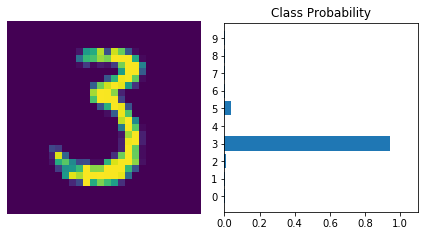

In [28]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))
img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = F.softmax(logits, dim=1)
helper.view_classify(img.view(1, 28, 28), ps)